# PROJECT - ADVANCED STATISTICS - MARRIPALLY RAVI KUMAR

### Problem 1A:

* Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
#Load salary data as a data frame and name it as sr
sr=pd.read_csv('SalaryData.csv')

#### Sample of the data frame

In [3]:
sr.head(10)

Education       Occupation  Salary
0   Bachelors     Adm-clerical  160910
1   Bachelors     Adm-clerical  162494
2   Bachelors     Adm-clerical  188729
3   Bachelors   Prof-specialty   99185
4   Bachelors   Prof-specialty   90135
5   Bachelors   Prof-specialty  100135
6   Bachelors   Prof-specialty  133696
7   Bachelors            Sales  149909
8   Bachelors            Sales  191712
9   Bachelors            Sales  167431

#### Let us check the size of the data frame

In [4]:
sr.shape

(40, 3)

1. There are 3 variables (columns) with 40 observations (rows) in the data frame.
2. Those 3 variables are Education, Occupation and Salary.
3. Education and Occupation are categorical variables and salary is a continuous variable

#### Check the types of variables in the data frame

In [5]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


#### Data description

In [6]:
sr.describe(include='all').round(1)

Education       Occupation    Salary
count           40               40      40.0
unique           3                4       NaN
top      Doctorate   Prof-specialty       NaN
freq            16               13       NaN
mean           NaN              NaN  162186.9
std            NaN              NaN   64860.4
min            NaN              NaN   50103.0
25%            NaN              NaN   99897.5
50%            NaN              NaN  169100.0
75%            NaN              NaN  214440.8
max            NaN              NaN  260151.0

#### Checking for duplicate rows

In [7]:
sr.duplicated().sum()

0

#### Let us remove the space at the begining of each and every enrtry in Education and Occupation variables

In [8]:
sr['Education']=sr['Education'].str.strip()
sr['Occupation']=sr['Occupation'].str.strip()

#### Let us check the count of each level in Education and Occupation variables

In [9]:
a=sr.Education.value_counts()
a

Doctorate    16
Bachelors    15
HS-grad       9
Name: Education, dtype: int64

In [10]:
b=sr.Occupation.value_counts()
b

Prof-specialty     13
Sales              12
Adm-clerical       10
Exec-managerial     5
Name: Occupation, dtype: int64

#### Let us check the outliers and distribution of salary variable

Text(0.5, 1.0, 'Histogram of Salary')

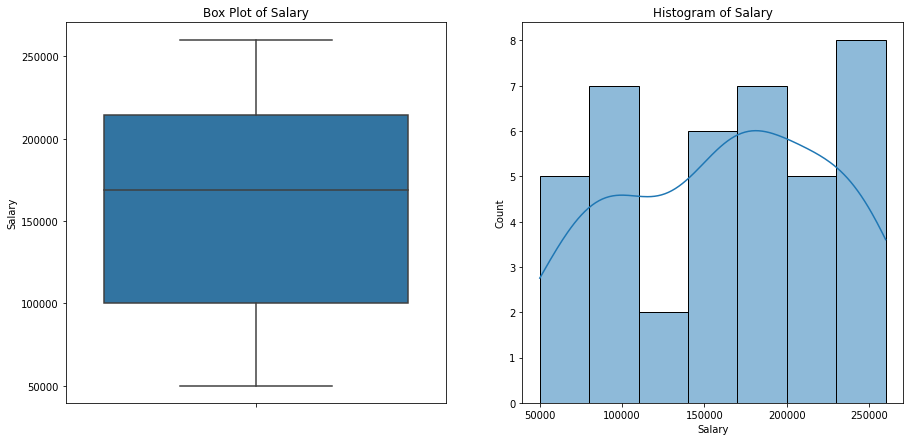

In [11]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(y=sr.Salary)
plt.title('Box Plot of Salary')
plt.subplot(1,2,2)
sns.histplot(x=sr.Salary,kde=True);
plt.title('Histogram of Salary')

In [83]:
sr.Salary.skew()

-0.17311792431161369

#### Insights:
1. There are no outliers in the salary variable
2. Hist plot with kde shows that distribution is left skewed

### Univariate Analysis

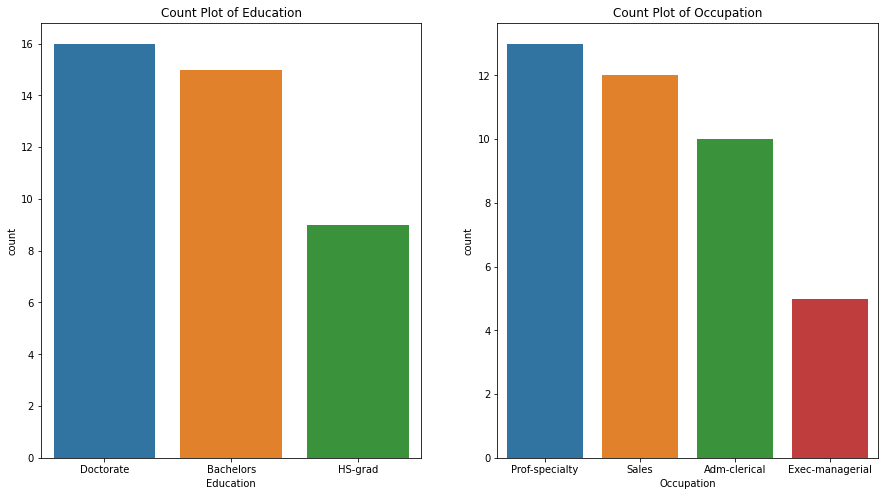

In [12]:
plt.figure(figsize=(15,8))
j=0
for i in sr.columns:
    if sr[i].dtype=='object':
        j=j+1
        plt.subplot(1,2,j)
        c=sr[i].value_counts().sort_values(ascending=False)
        sns.countplot(x=sr[i],order=c.index);
        plt.title('Count Plot of '+i)

#### Insights:
1. The most of the people are doctorates and the least are HS-grad.
2. The most of the people have Prof-speciality occupation and the least have Exec-managerial occupation.

### Bivariate Analysis 

#### Contingency table for Education and Occupation

In [13]:
pd.crosstab(index=sr.Education,columns=sr.Occupation,margins=True)

Occupation  Adm-clerical  Exec-managerial  Prof-specialty  Sales  All
Education                                                            
Bachelors              3                4               4      4   15
Doctorate              4                1               6      5   16
HS-grad                3                0               3      3    9
All                   10                5              13     12   40

#### Count Plot for Education and Occupation

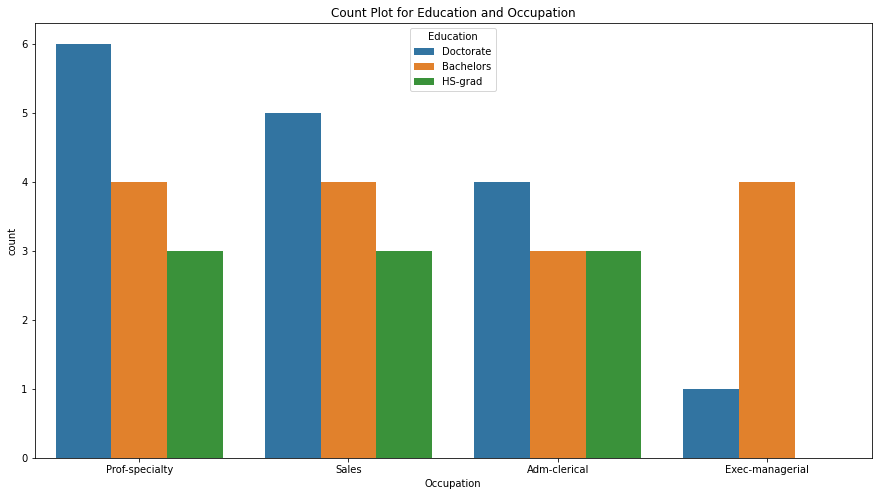

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x=sr.Occupation,hue=sr.Education,data=sr,order=b.index,hue_order=a.index);
plt.title('Count Plot for Education and Occupation')
plt.show()

#### Insights:
1. In almost all occupation levels, Doctorates are highest in number except Exec-managerial occupation.
2. People with Bachelors degree are distributed almost equally in all occupations. They are dominant in Exec-managerial occupation.
2. People with HS-grad qualification are distributed almost equally in all occupations except Exec-managerial occupation. People with HS-grad qualification are not recruited for Exec-managerial position.

#### Point Plots

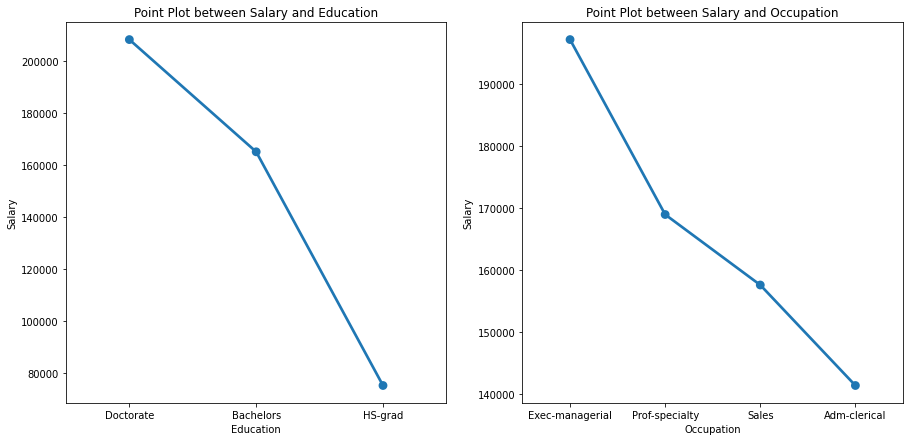

In [15]:
plt.figure(figsize=(15,7))
j=0
for i in sr.columns:
    if sr[i].dtype=='object':
        j=j+1
        plt.subplot(1,2,j)
        d=sr.groupby(i).mean().sort_values(by='Salary',ascending=False)
        sns.pointplot(x=d.index,y=d.Salary);
        plt.title('Point Plot between Salary and '+i)

In [16]:
f=sr.groupby('Education').mean().sort_values(by='Salary',ascending=False)
f

Salary
Education               
Doctorate  208427.000000
Bachelors  165152.933333
HS-grad     75038.777778

In [17]:
g=sr.groupby('Occupation').mean().sort_values(by='Salary',ascending=False)
g

Salary
Occupation                    
Exec-managerial  197117.600000
Prof-specialty   168953.153846
Sales            157604.416667
Adm-clerical     141424.300000

#### Insights:
1. Doctorates are getting highest salary and HS-grad are getting lowest salary.
2. Exec-managers are getting highest salary and Adm-clerical are getting lowest salary.

### Q1.1.  State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### One-way ANOVA on Salary with respect to Education
* Null Hypothesis, H0: Mean salary is equal for all Education levels.
* Alternative Hypothesis, H1: Mean salary is differnt for atleast one Education level.

#### One-way ANOVA on Salary with respect to Occupation
* Null Hypothesis, H0: Mean salary is equal for all Occupation levels.
* Alternative Hypothesis, H1: Mean salary is different for at least one Occupation level.

### Q1.2.  Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### One-way ANOVA on Salary with respect to Education
* Null Hypothesis, H0: Mean salary is equal for all Education levels.
* Alternative Hypothesis, H1: Mean salary is differnt for atleast one Education level.
* Let significance level = 0.05

In [18]:
formula1 = 'Salary ~ C(Education)'
model1 = ols(formula1, sr).fit()
aov_table1 = anova_lm(model1)
aov_table1

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

#### Conclusion: 
* As the value of p (1.257709e-08) is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis i.e mean salary is different for at least one Education level. Hence, Education is a significant factor for salary variable.

### Q1.3.  Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### One-way ANOVA on Salary with respect to Occupation
* Null Hypothesis, H0: Mean salary is equal for all Occupation levels.
* Alternative Hypothesis, H1: Mean salary is differnt for atleast one Occupation level.
* Let significance level = 0.05

In [19]:
formula2 = 'Salary ~ C(Occupation)'
model2 = ols(formula2, sr).fit()
aov_table2 = anova_lm(model2)
aov_table2

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

#### Conclusion: 
* As the value of p (0.458508) is more than 0.05, we failed to reject the null hypothesis and we do not have strong evidence to accept the alternative hypothesis. Hence, mean salary is equal for all Occupation levels and Occupation is not a significant factor for salary variable.

### Q1.4.  If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [20]:
round(sr.groupby('Education').mean().sort_values(by='Salary',ascending=False),1)

Salary
Education          
Doctorate  208427.0
Bachelors  165152.9
HS-grad     75038.8

In [87]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [88]:
# Posthoc test: Tukey test
MultiComp=pairwise_tukeyhsd(endog=sr.Salary,groups=sr.Education,alpha=0.05)
print(MultiComp)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1    group2    meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------------
Bachelors Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
Bachelors   HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
Doctorate   HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-----------------------------------------------------------------------


#### Interpretation:
1. We rejected the null hypothesis in one-way ANOVA test on Salary with respect to Education because we got the p-value (1.257709e-08) less than 0.05.
2. From above Tukey test results, we can notice that p value is less than 0.05 for each possible pair in education level. Hence, the mean salary of each education level is significantly different from other education levels.

## Problem 1B:

### Q1.5.  What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

#### Pivot Table

In [24]:
pd.crosstab(values=sr.Salary,aggfunc='mean',columns=sr.Education,index=sr.Occupation,margins=True).round(1)

Education        Bachelors  Doctorate  HS-grad       All
Occupation                                              
Adm-clerical      170711.0   166457.8  78759.7  141424.3
Exec-managerial   193201.8   212781.0      NaN  197117.6
Prof-specialty    105787.8   247772.8  95534.3  168953.2
Sales             192300.8   193916.6  50822.3  157604.4
All               165152.9   208427.0  75038.8  162186.9

#### Interaction plot

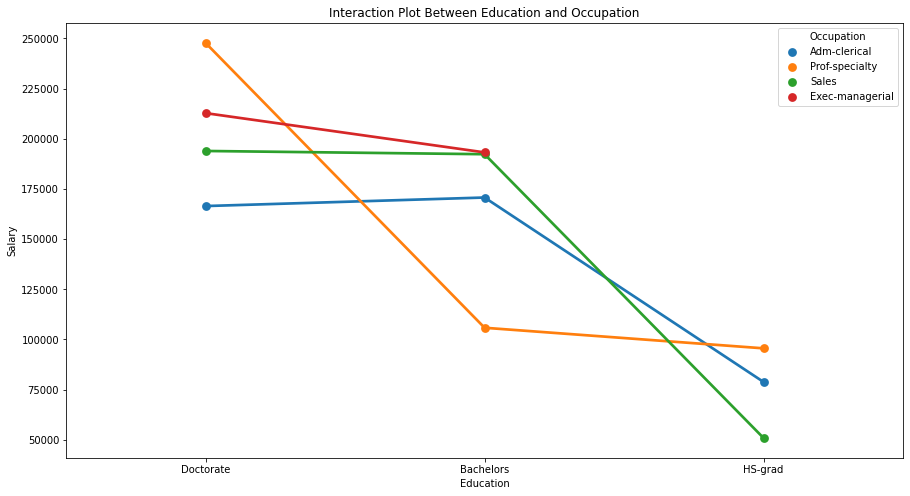

In [25]:
plt.figure(figsize=(15,8))
sns.pointplot(hue=sr.Occupation,y=sr.Salary,x=sr.Education,data=sr,order=f.index,ci=False)
plt.title('Interaction Plot Between Education and Occupation')
plt.show()

#### Interaction:
1. Interaction effect indicates that a third variable influences the relationship between an independent and dependent variable.
2. On an interaction plot, parallel lines indicate that there is no interaction effect.
3. On an interaction plot, the crossed lines suggest that there might be an interaction effect.

#### Analysis
From above interaction plot, we can write below insights
1. Point plots drawn between Education and salary for different occupation levels cross each other at different points. Hence, there might be interaction between Education and Occupation.
2. The difference in salary from doctorates to Bachelors is very high in Prof-specialty occupation where as in other occupations the difference in salary is marginal.
3. The difference in salary from Bachelors to HS-grade is marginal in Prof-specialty occupation where as in other occupations the difference in salary is very high. Hence, Occupation influences the effect of education on salary.

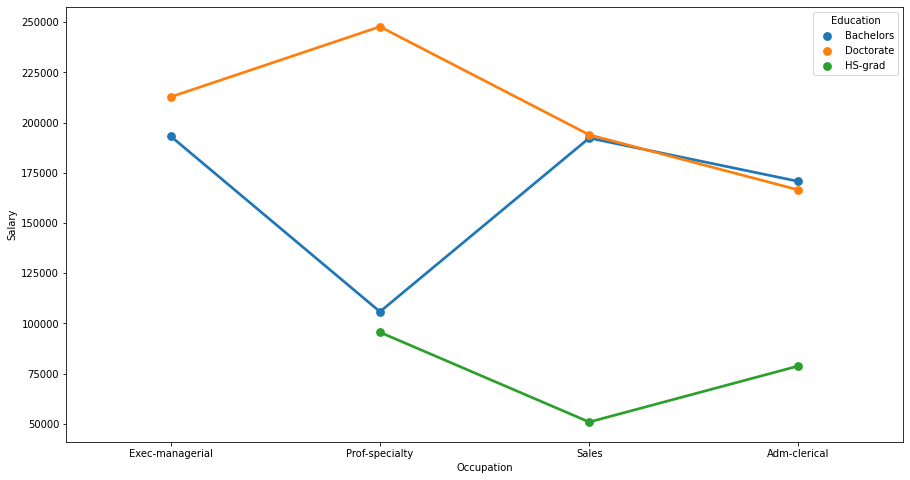

In [26]:
plt.figure(figsize=(15,8))
sns.pointplot(x=sr.Occupation,y=sr.Salary,hue=sr.Education,data=sr,order=g.index,ci=False)
plt.show()

### Q1.6.  Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

#### Tne-way ANOVA on Salary with respect to Education, Occupation and their interaction (Education*Occupation)

1. For Education Factor
* Null Hypothesis, H0: Mean salary is equal for all Education levels.
* Alternative Hypothesis, H1: Mean salary is different for at least one Education level

2. For Occupation Factor
* Null Hypothesis, H0: Mean salary is equal for all Occupation levels.
* Alternative Hypothesis, H1: Mean salary is different for at least one Occupation level.

3. For Interaction (Education:Occupation) Factor
* Null Hypothesis, H0: There is no interaction between Education and Occupation.
* Alternative Hypothesis, H1: There is interaction between Education and Occupation.

* Let significance level = 0.05

In [27]:
formula3 = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model3 = ols(formula3, sr).fit()
aov_table3 = anova_lm(model3)
aov_table3

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.757017e+10  6.261695e+09   8.806021   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  1.676858e-05  
Residual                             NaN

#### Interpretation of results:
1. As the value of p (5.466264e-12) is less than 0.05 for Education factor, we reject the null hypothesis and accept the alternative hypothesis i.e mean salary is different for at least one Education level. Hence, Education is a significant factor for salary variable.
2. As the value of p (0.072) is more than 0.05 for Occupation factor, we failed to reject the null hypothesis and we do not have strong evidence to accept the alternative hypothesis. Hence, mean salary is equal for all Occupation levels and Occupation is not a significant factor for salary variable.
3. As the value of p (1.676858e-05) is less than 0.05 for interaction factor (Education:Occupation), we reject the null hypothesis and accept the alternative hypothesis i.e there is interaction between Education and Occupation.

### Q1.7.  Explain the business implications of performing ANOVA for this particular case study.

####  We can conclude the following business implications by performing ANOVA for this particular case study
1. Educational qualification is a significant factor for salary variable with significance level of 0.05 (95% confidence). Doctorates are getting highest salary and HS-grad are getting lowest salary.
2. Occupation is not a significant factor for salary variable with significance level of 0.05 (95% confidence) but it is significant with significance level of 0.08 (92% confidence). Hence, the effect of occupation on salary can not be ignored completely. Exec-managers are getting highest salary and Adm-clerical are getting lowest salary.
3. There is interaction between Education and Occupation. Doctorates with Prof-specialty occupation are getting high salary and HS-Grad with sales occupation are getting low salary. This indicates that there is interaction between Education and Occupation.
4. HS-grad can be recruited for sales and Adm-clerical occupations to reduce the expenditure on salary because they are available for low salary. The performance of employees with different education on these job roles has to evaluated before taking the decision.
5. Bachelors can be recruited for Prof-specialty and Exec-managerial to reduce the expenditure on salary because they are available for low salary. The performance of employees with different education on these job roles has to evaluated before taking the decision.
6. It is better if performance feature is given along with salary feature to come with accurate business implications.

## Problem 2

* The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [28]:
#Load Education data as a data frame and name it as ed
ed=pd.read_csv('Education.csv')

#### Sample of the data frame

In [29]:
ed.head(8).T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  \
Names        Agnes Scott College  Alaska Pacific University   
Apps                         417                        193   
Accept                       349                        146   
Enroll                       137                         55   
Top10perc                     60                         16   
Top25perc                     89                         44   
F.Undergrad                  510                        249   
P.Undergrad                   63                        869   
Outstate                   12960                       7560   
Room.Board                  5450                       4120   
Books                        450                        800   
Personal                     875                       1500   
PhD                           92                         76   
Terminal                      97                         72   
S.F.Ratio                    7.7                       11.9   
perc.alumni                   37                          2   
Expend                     19016                      10922   
Grad.Rate                     59                         15   

                             5                        6               7  
Names        Albertson College  Albertus Magnus College  Albion College  
Apps                       587                      353            1899  
Accept                     479                      340            1720  
Enroll                     158                      103             489  
Top10perc                   38                       17              37  
Top25perc                   62                       45              68  
F.Undergrad                678                      416            1594  
P.Undergrad                 41                      230              32  
Outstate                 13500                    13290           13868  
Room.Board                3335                     5720            4826  
Books                      500                      500             450  
Personal                   675                     1500             850  
PhD                         67                       90              89  
Terminal                    73                       93             100  
S.F.Ratio                  9.4                     11.5            13.7  
perc.alumni                 11                       26              37  
Expend                    9727              

#### Let us check the size of the data frame

In [30]:
ed.shape

(777, 18)

* There are 18 features (columns) with 777 observations (rows) in the data frame.

#### Let us check the data type of variables in the data frame

In [31]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

* University Names is of object data type and remaining features are of numerical (int64 & float64) data type.

#### Data description

In [32]:
ed.describe().T.round(1)

count     mean     std     min     25%     50%      75%      max
Apps         777.0   3001.6  3870.2    81.0   776.0  1558.0   3624.0  48094.0
Accept       777.0   2018.8  2451.1    72.0   604.0  1110.0   2424.0  26330.0
Enroll       777.0    780.0   929.2    35.0   242.0   434.0    902.0   6392.0
Top10perc    777.0     27.6    17.6     1.0    15.0    23.0     35.0     96.0
Top25perc    777.0     55.8    19.8     9.0    41.0    54.0     69.0    100.0
F.Undergrad  777.0   3699.9  4850.4   139.0   992.0  1707.0   4005.0  31643.0
P.Undergrad  777.0    855.3  1522.4     1.0    95.0   353.0    967.0  21836.0
Outstate     777.0  10440.7  4023.0  2340.0  7320.0  9990.0  12925.0  21700.0
Room.Board   777.0   4357.5  1096.7  1780.0  3597.0  4200.0   5050.0   8124.0
Books        777.0    549.4   165.1    96.0   470.0   500.0    600.0   2340.0
Personal     777.0   1340.6   677.1   250.0   850.0  1200.0   1700.0   6800.0
PhD          777.0     72.7    16.3     8.0    62.0    75.0     85.0    103.0
Terminal     777.0     79.7    14.7    24.0    71.0    82.0     92.0    100.0
S.F.Ratio    777.0     14.1     4.0     2.5    11.5    13.6     16.5     39.8
perc.alumni  777.0     22.7    12.4     0.0    13.0    21.0     31.0     64.0
Expend       777.0   9660.2  5221.8  3186.0  6751.0  8377.0  10830.0  56233.0
Grad.Rate    777.0     65.5    17.2    10.0    53.0    65.0     78.0    118.0

#### Insights:
1. Students are preferring full time under graduation over part time under graduation.
2. Average S.F Ratio is 14.1 which is good for institution.
3. Average percentage of alumni who donate is 22.7 which is a good sign of alumni securing top positions in industry.
4. Average graduation rate is 65.5%. It needs improvement.

In [33]:
ed.columns=ed.columns.str.replace('.','_')

#### Checking for duplicate rows

In [34]:
ed.duplicated().sum()

0

#### Checking for no. of unique observations in each feature

In [35]:
ed.nunique()

Names          777
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F_Undergrad    714
P_Undergrad    566
Outstate       640
Room_Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S_F_Ratio      173
perc_alumni     61
Expend         744
Grad_Rate       81
dtype: int64

### 2.1.  Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### Univariate Analysis

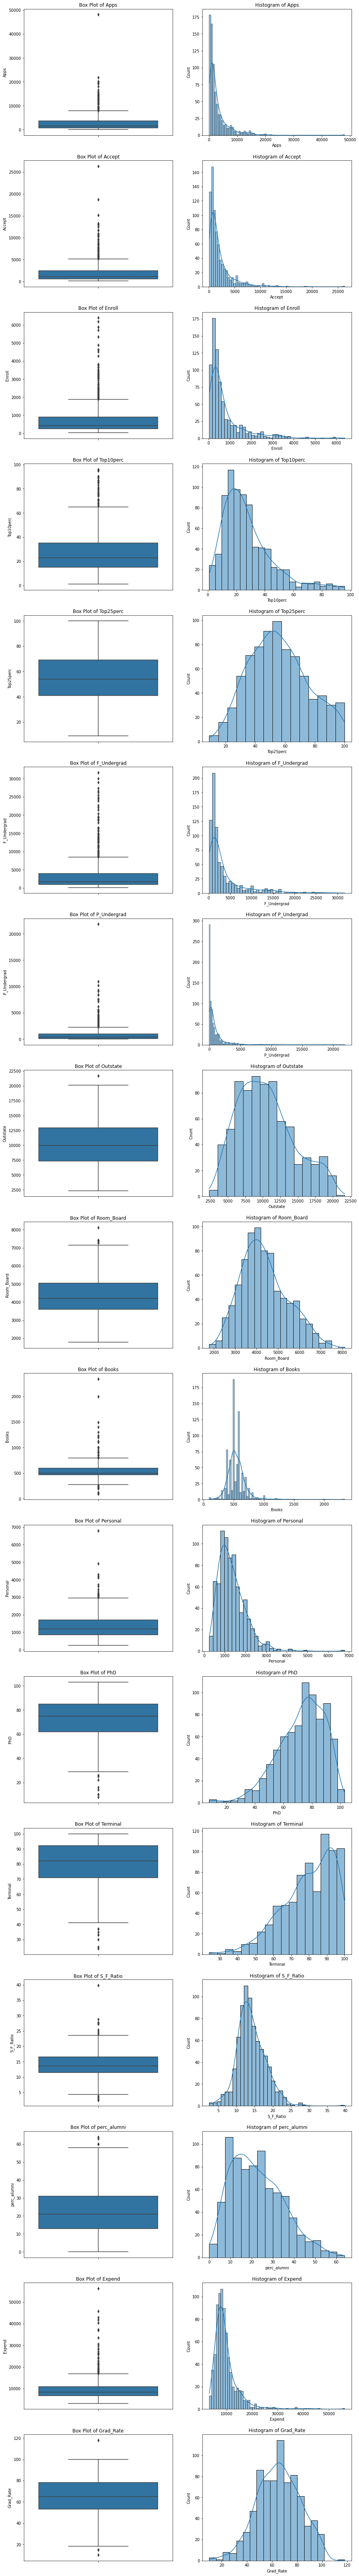

In [36]:
j=0
plt.figure(figsize = (15,120))
for i in ed.columns:
    if ed[i].dtype!=('object'):
        j=j+1
        plt.subplot(17,2,j)
        sns.boxplot(y=ed[i],data=ed)
        plt.title('Box Plot of '+i)
        k=j+1
        plt.subplot(17,2,k)
        sns.histplot(x=ed[i],kde=True)
        plt.title('Histogram of '+i)
        j=j+1

In [37]:
#edn=Numerical data frame of ed (dropped names column)
edn=ed.drop('Names',axis=1)

In [38]:
edn.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F_Undergrad  P_Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room_Board  Books  Personal  PhD  Terminal  S_F_Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc_alumni  Expend  Grad_Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [39]:
# shapiro test for all continuous featurs
m=[]
for i in edn.columns:
    s,p=st.shapiro(ed[i])
    m.append(p)
pd.DataFrame(m,index=edn.columns,columns=['P value from shapiro test'])

P value from shapiro test
Apps                      6.817377e-37
Accept                    1.715629e-36
Enroll                    6.460357e-36
Top10perc                 2.450675e-23
Top25perc                 1.666837e-07
F_Undergrad               8.190184e-37
P_Undergrad               2.266040e-41
Outstate                  4.178049e-12
Room_Board                6.606379e-09
Books                     1.650074e-31
Personal                  8.492892e-23
PhD                       7.842821e-14
Terminal                  2.038570e-17
S_F_Ratio                 4.492705e-11
perc_alumni               1.853276e-12
Expend                    1.642881e-34
Grad_Rate                 9.418597e-03

In [40]:
# Checking skewness of each feature
ed.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F_Undergrad    2.610458
P_Undergrad    5.692353
Outstate       0.509278
Room_Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S_F_Ratio      0.667435
perc_alumni    0.606891
Expend         3.459322
Grad_Rate     -0.113777
dtype: float64

#### Insights:
From above plots, we can conclude the following points.
1. All features have outliers except Top25perc feature.
2. None of the features follows normal distribution.
3. All features have positive skewness except PhD, Teminal and Grad_Rate features (Negative Skewness).

#### Bivariate Analysis

#### Heatmap

<AxesSubplot:>

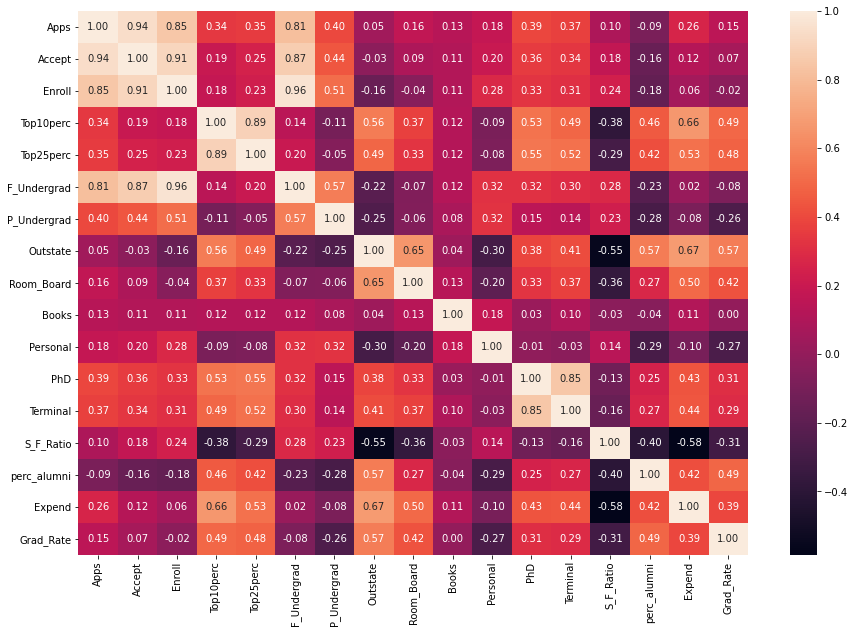

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(ed.corr(),annot=True,fmt='.2f')

#### Insights:
#### There is a strong correlation between the following features 
    a. Enroll and F_Undergrad (corr=0.96)
    b. Apps and Accept (corr=0.94)
    c. Accept and Enroll (corr=0.91)
    d. Top10perc and Top25perc (corr=0.89)
    e. Accept and F_Undergrad (corr=0.87)    

<Figure size 1080x1080 with 0 Axes>

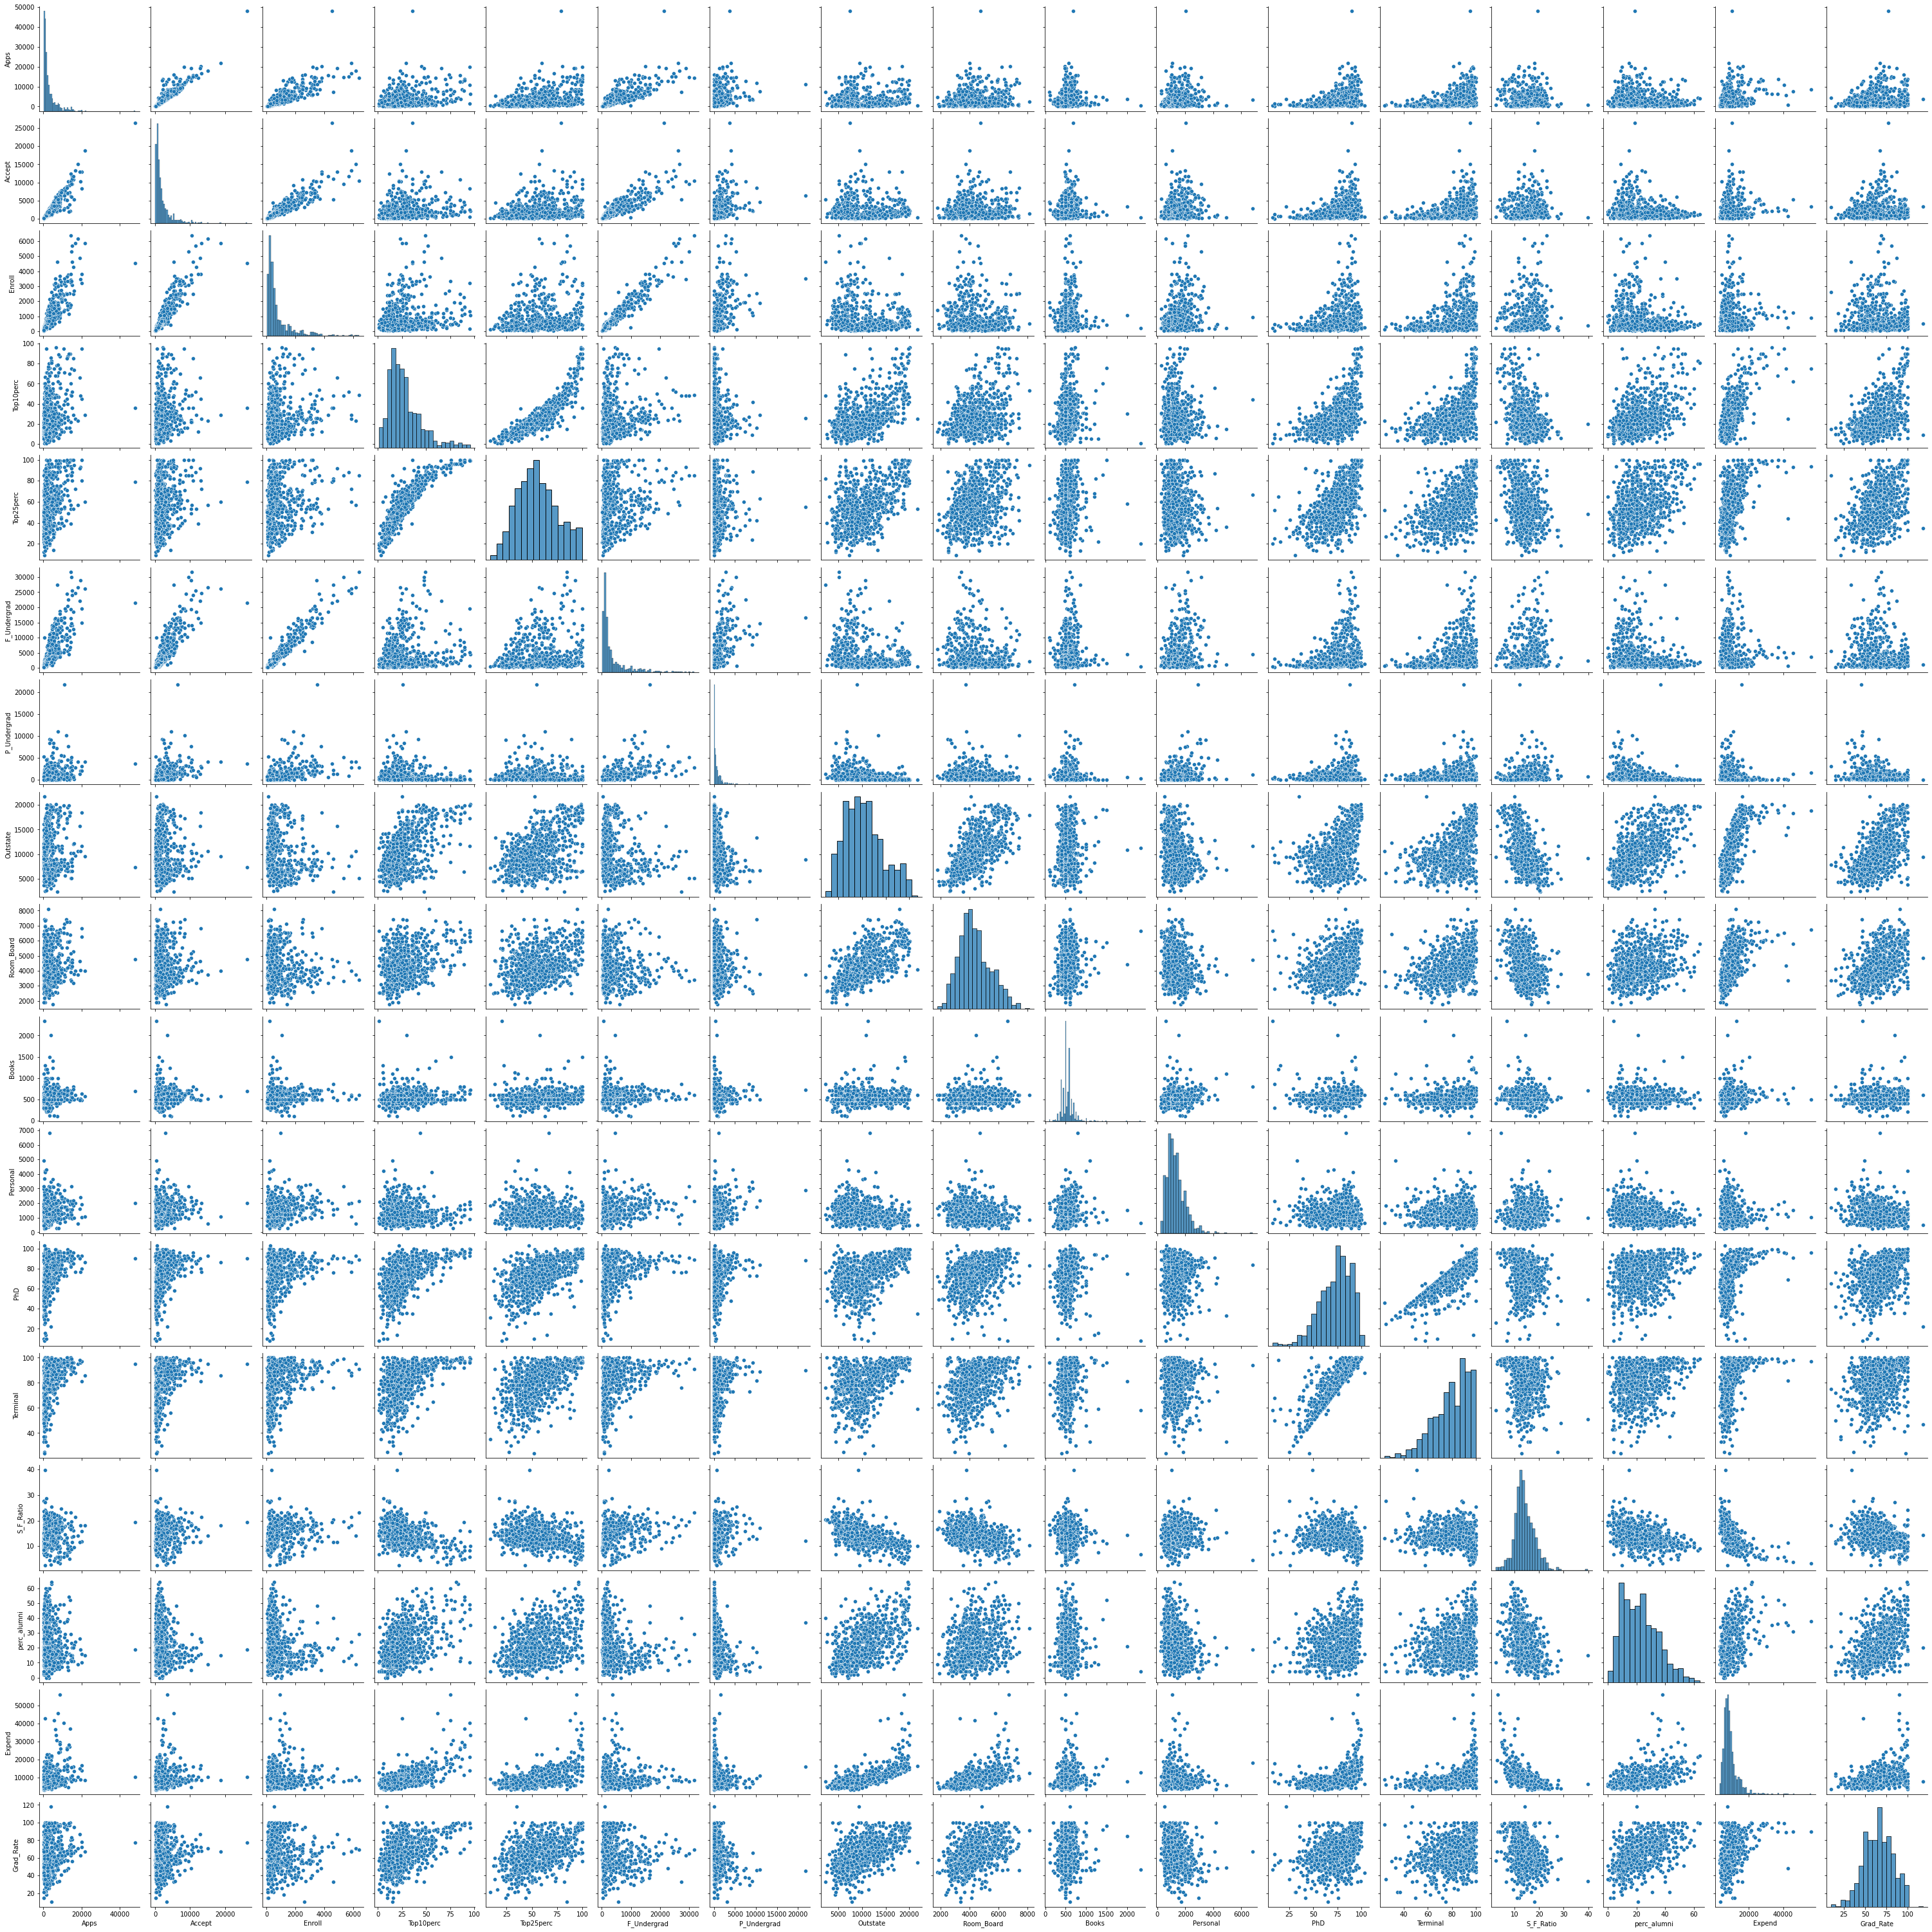

In [42]:
plt.figure(figsize=(15,15))
sns.pairplot(ed)

<AxesSubplot:xlabel='Apps', ylabel='F_Undergrad'>

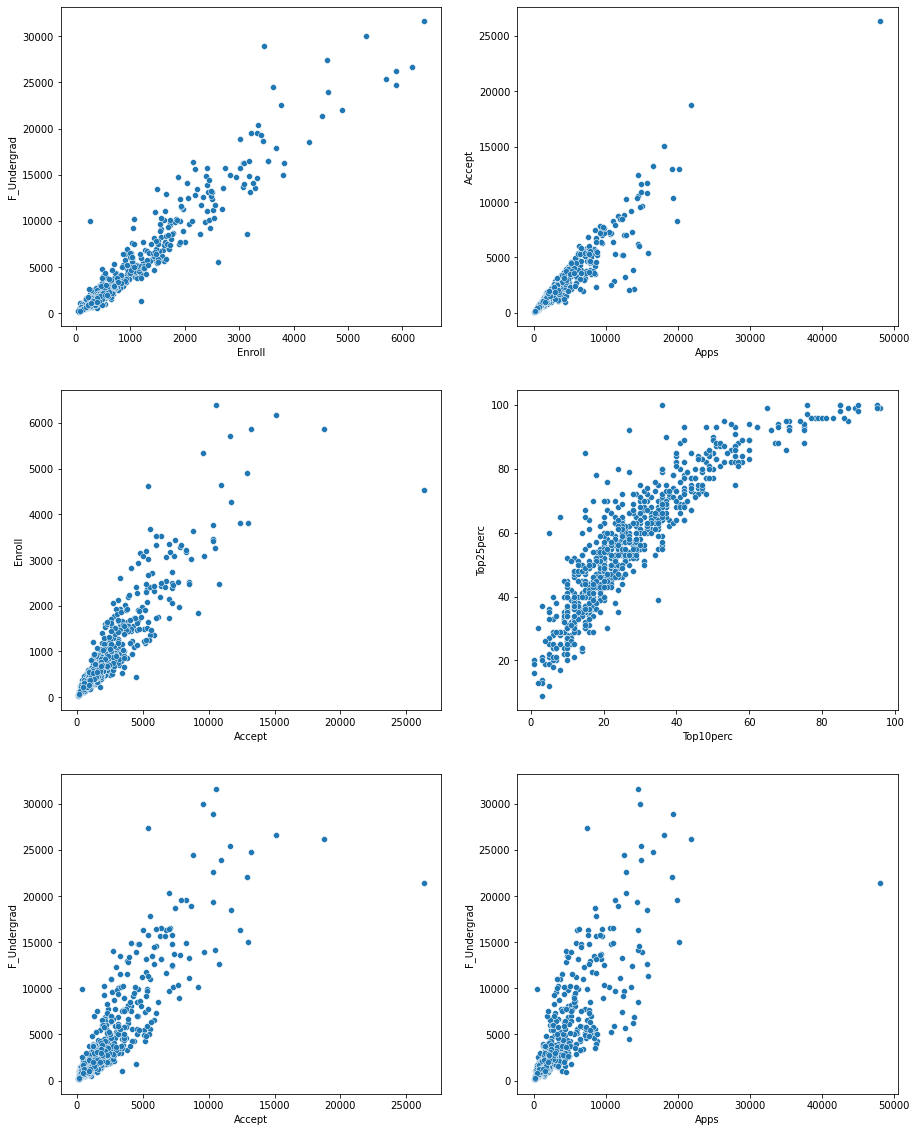

In [43]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20)) 
#0.9
sns.scatterplot(x=ed.Enroll,y=ed.F_Undergrad,ax=axs[0][0])
#0.94
sns.scatterplot(x='Apps',y='Accept',data=ed,ax=axs[0][1])
#0.91
sns.scatterplot(x=ed.Accept,y=ed.Enroll,ax=axs[1][0])
#0.89
sns.scatterplot(x=ed.Top10perc,y=ed.Top25perc,ax=axs[1][1])
#0.87
sns.scatterplot(x=ed.Accept,y=ed.F_Undergrad,ax=axs[2][0])
#0.81
sns.scatterplot(x=ed.Apps,y=ed.F_Undergrad,ax=axs[2][1])

### 2.2.  Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [44]:
ed.describe().T[['mean','std']]

mean          std
Apps          3001.638353  3870.201484
Accept        2018.804376  2451.113971
Enroll         779.972973   929.176190
Top10perc       27.558559    17.640364
Top25perc       55.796654    19.804778
F_Undergrad   3699.907336  4850.420531
P_Undergrad    855.298584  1522.431887
Outstate     10440.669241  4023.016484
Room_Board    4357.526384  1096.696416
Books          549.380952   165.105360
Personal      1340.642214   677.071454
PhD             72.660232    16.328155
Terminal        79.702703    14.722359
S_F_Ratio       14.089704     3.958349
perc_alumni     22.743887    12.391801
Expend        9660.171171  5221.768440
Grad_Rate       65.463320    17.177710

#### From the above table, we conclude the following points
* Means are significantly different for all features.
* Standard deviations are also significantly different for all features.
* As units and magnitudes are different for all features, it is necessary to perform scaling to bring all features to a common scale.

#### Scaling

In [45]:
#eds: ed scaled
from scipy.stats import zscore
eds=edn.apply(zscore)

In [46]:
eds.head(12).T

0         1         2         3         4         5   \
Apps        -0.346882 -0.210884 -0.406866 -0.668261 -0.726176 -0.624307   
Accept      -0.321205 -0.038703 -0.376318 -0.681682 -0.764555 -0.628611   
Enroll      -0.063509 -0.288584 -0.478121 -0.692427 -0.780735 -0.669812   
Top10perc   -0.258583 -0.655656 -0.315307  1.840231 -0.655656  0.592287   
Top25perc   -0.191827 -1.353911 -0.292878  1.677612 -0.596031  0.313426   
F_Undergrad -0.168116 -0.209788 -0.549565 -0.658079 -0.711924 -0.623421   
P_Undergrad -0.209207  0.244307 -0.497090 -0.520752  0.009005 -0.535212   
Outstate    -0.746356  0.457496  0.201305  0.626633 -0.716508  0.760947   
Room_Board  -0.964905  1.909208 -0.554317  0.996791 -0.216723 -0.932970   
Books       -0.602312  1.215880 -0.905344 -0.602312  1.518912 -0.299280   
Personal     1.270045  0.235515 -0.259582 -0.688173  0.235515 -0.983753   
PhD         -0.163028 -2.675646 -1.204845  1.185206  0.204672 -0.346878   
Terminal    -0.115729 -3.378176 -0.931341  1.175657 -0.523535 -0.455567   
S_F_Ratio    1.013776 -0.477704 -0.300749 -1.615274 -0.553542 -1.185526   
perc_alumni -0.867574 -0.544572  0.585935  1.151188 -1.675079 -0.948325   
Expend      -0.501910  0.166110 -0.177290  1.792851  0.241803  0.012806   
Grad_Rate   -0.318252 -0.551262 -0.667767 -0.376504 -2.939613 -0.609514   

                   6         7         8         9         10        11  
Apps        -0.684808 -0.285088 -0.507700 -0.625600 -0.328266 -0.090399  
Accept      -0.685356 -0.121984 -0.481644 -0.620854 -0.242415 -0.048501  
Enroll      -0.729043 -0.313353 -0.595505 -0.654735 -0.331661 -0.318738  
Top10perc   -0.598931  0.535563  0.138490 -0.372032  0.535563  0.932636  
Top25perc   -0.545505  0.616579  0.363952 -0.596031  0.970257  1.071307  
F_Undergrad -0.677472 -0.434450 -0.562562 -0.598459 -0.385763 -0.411138  
P_Undergrad -0.410988 -0.541127 -0.361036 -0.510893 -0.489860 -0.533240  
Outstate     0.708713  0.852479  1.282036  0.006798  1.519075  1.651399  
Room_Board   1.243144  0.427443  0.038754 -0.891911  0.956645  0.075250  
Books       -0.299280 -0.602312 -1.511408  0.670422 -0.299280 -0.905344  
Personal     0.235515 -0.725120 -1.242385  0.678885 -1.094595 -1.094595  
PhD          1.062639  1.001356  0.388522 -2.001529  0.572372  0.020822  
Terminal     0.903786  1.379560  0.292077 -2.630532  0.563948  0.767851  
S_F_Ratio   -0.654660 -0.098515 -0.705218 -0.654660 -0.705218 -1.059129  
perc_alumni  0.262933  1.151188  0.020681 -0.625323  0.666685  1.474190  
Expend      -0.153145  0.350074  0.380160 -0.128233  0.243720  0.392999  
Grad_Rate   -0.143495  0.439030  0.846798 -0.784272  0.439030  0.613788

#### Data description of scaled dataset

In [47]:
eds.describe().T.round(2)

count  mean  std   min   25%   50%   75%    max
Apps         777.0   0.0  1.0 -0.76 -0.58 -0.37  0.16  11.66
Accept       777.0   0.0  1.0 -0.79 -0.58 -0.37  0.17   9.92
Enroll       777.0  -0.0  1.0 -0.80 -0.58 -0.37  0.13   6.04
Top10perc    777.0  -0.0  1.0 -1.51 -0.71 -0.26  0.42   3.88
Top25perc    777.0  -0.0  1.0 -2.36 -0.75 -0.09  0.67   2.23
F_Undergrad  777.0  -0.0  1.0 -0.73 -0.56 -0.41  0.06   5.76
P_Undergrad  777.0  -0.0  1.0 -0.56 -0.50 -0.33  0.07  13.79
Outstate     777.0   0.0  1.0 -2.01 -0.78 -0.11  0.62   2.80
Room_Board   777.0   0.0  1.0 -2.35 -0.69 -0.14  0.63   3.44
Books        777.0  -0.0  1.0 -2.75 -0.48 -0.30  0.31  10.85
Personal     777.0   0.0  1.0 -1.61 -0.73 -0.21  0.53   8.07
PhD          777.0   0.0  1.0 -3.96 -0.65  0.14  0.76   1.86
Terminal     777.0  -0.0  1.0 -3.79 -0.59  0.16  0.84   1.38
S_F_Ratio    777.0  -0.0  1.0 -2.93 -0.65 -0.12  0.61   6.50
perc_alumni  777.0  -0.0  1.0 -1.84 -0.79 -0.14  0.67   3.33
Expend       777.0   0.0  1.0 -1.24 -0.56 -0.25  0.22   8.92
Grad_Rate    777.0   0.0  1.0 -3.23 -0.73 -0.03  0.73   3.06

### 2.3.  Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

#### Heatmap for Covariance Matrix

<AxesSubplot:>

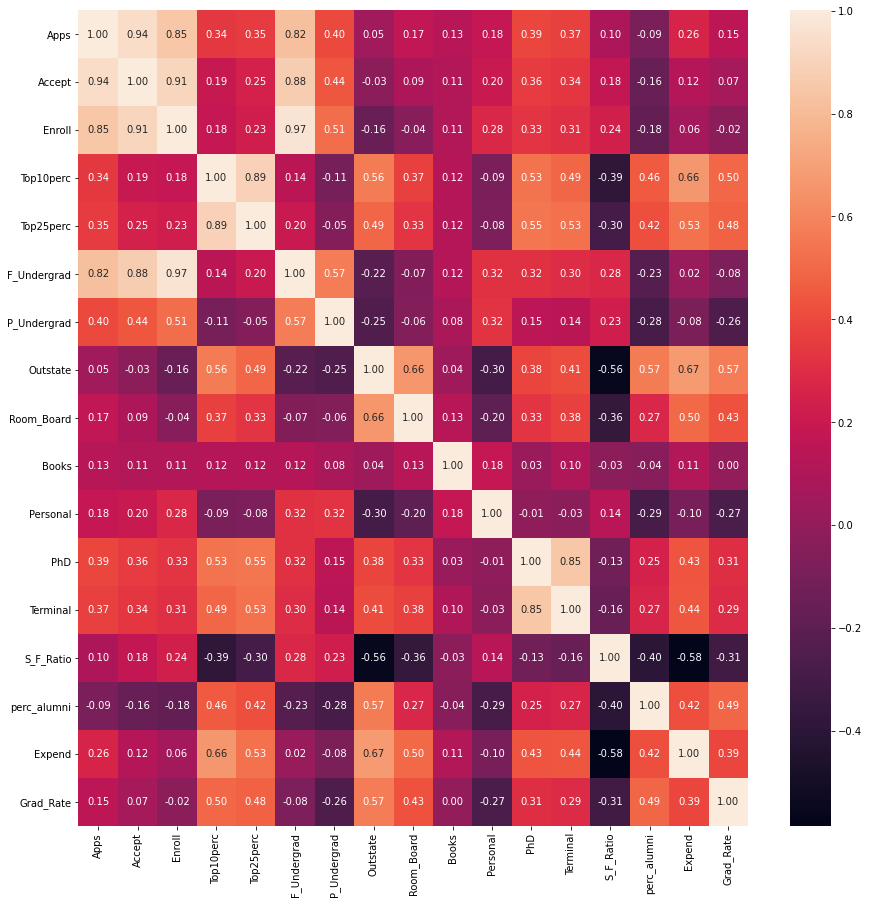

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(np.cov(m=eds.T),index=eds.columns,columns=eds.columns),annot=True,fmt='.2f')

#### Heatmap for Correlation Matrix

<AxesSubplot:>

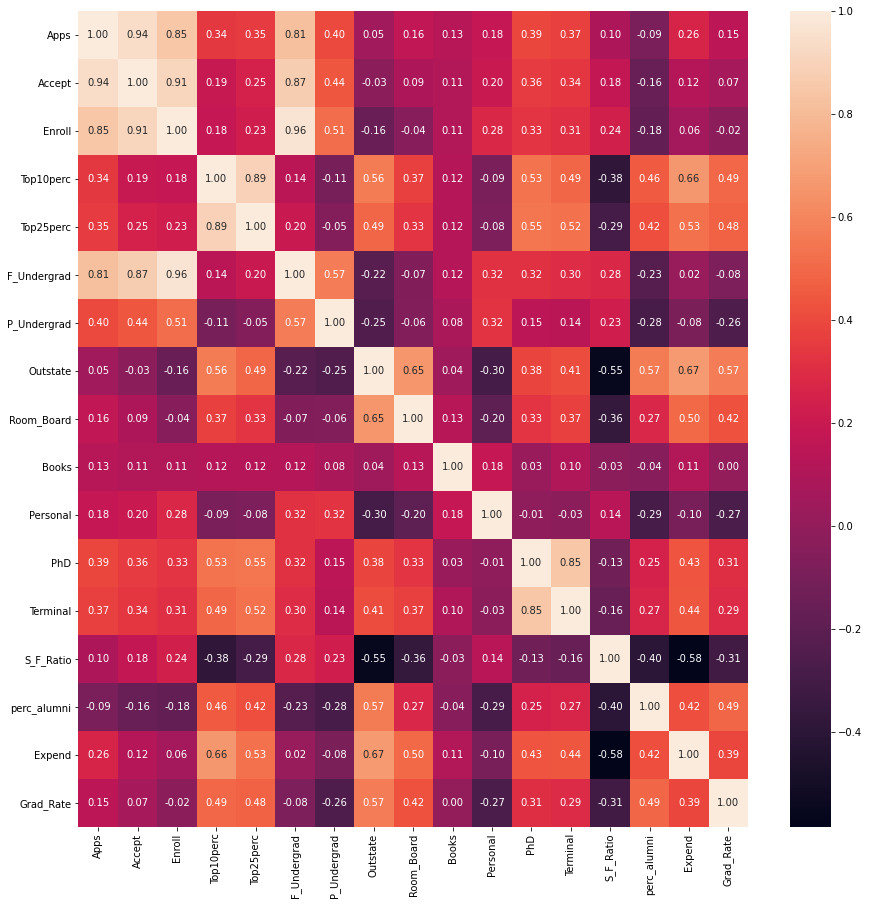

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(eds.corr(),annot=True,fmt='.2f')

* From above observaton, we conclude both covariance and correlation matrices are identical for standardized dataset.

### 2.4.  Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

#### Outliers before scaling

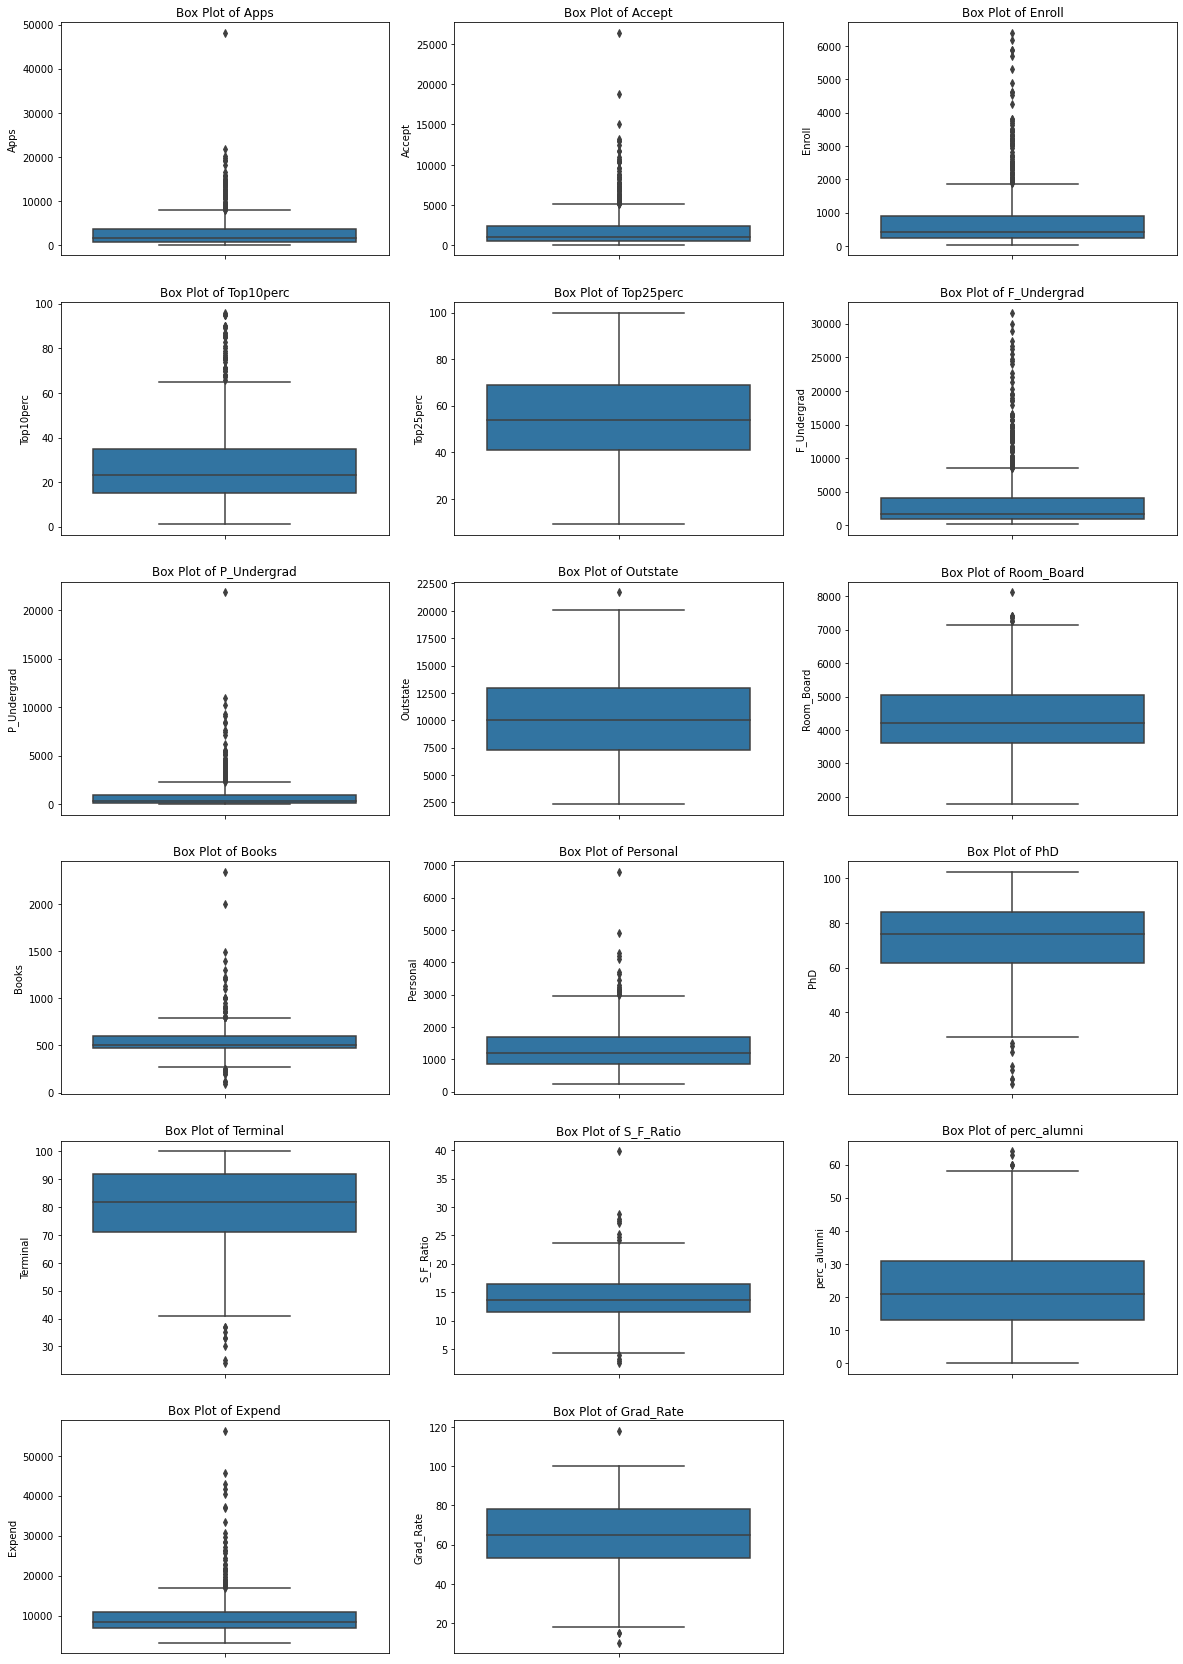

In [50]:
plt.figure(figsize=(20,30))
j=0
for i in edn.columns:
    j=j+1
    plt.subplot(6,3,j)
    sns.boxplot(y=edn[i]);
    plt.title('Box Plot of '+i)      

In [51]:
#Checking for Outliers
Q1=edn.quantile(0.25)
Q3=edn.quantile(0.75)
IQR=Q3-Q1
h=pd.DataFrame(edn[(edn<(Q1-1.5*IQR))|(edn>(Q3+1.5*IQR))].count().sort_values(ascending=False),columns=['No_of_Outliers'])
h['Percentage_of_Outliers']=round(h['No_of_Outliers']/edn.shape[0]*100,1)
h

No_of_Outliers  Percentage_of_Outliers
F_Undergrad              97                    12.5
Enroll                   79                    10.2
Accept                   73                     9.4
Apps                     70                     9.0
P_Undergrad              67                     8.6
Expend                   48                     6.2
Books                    46                     5.9
Top10perc                39                     5.0
Personal                 20                     2.6
S_F_Ratio                12                     1.5
Terminal                  8                     1.0
PhD                       8                     1.0
Room_Board                7                     0.9
perc_alumni               5                     0.6
Grad_Rate                 4                     0.5
Outstate                  1                     0.1
Top25perc                 0                     0.0

#### Outliers after scaling

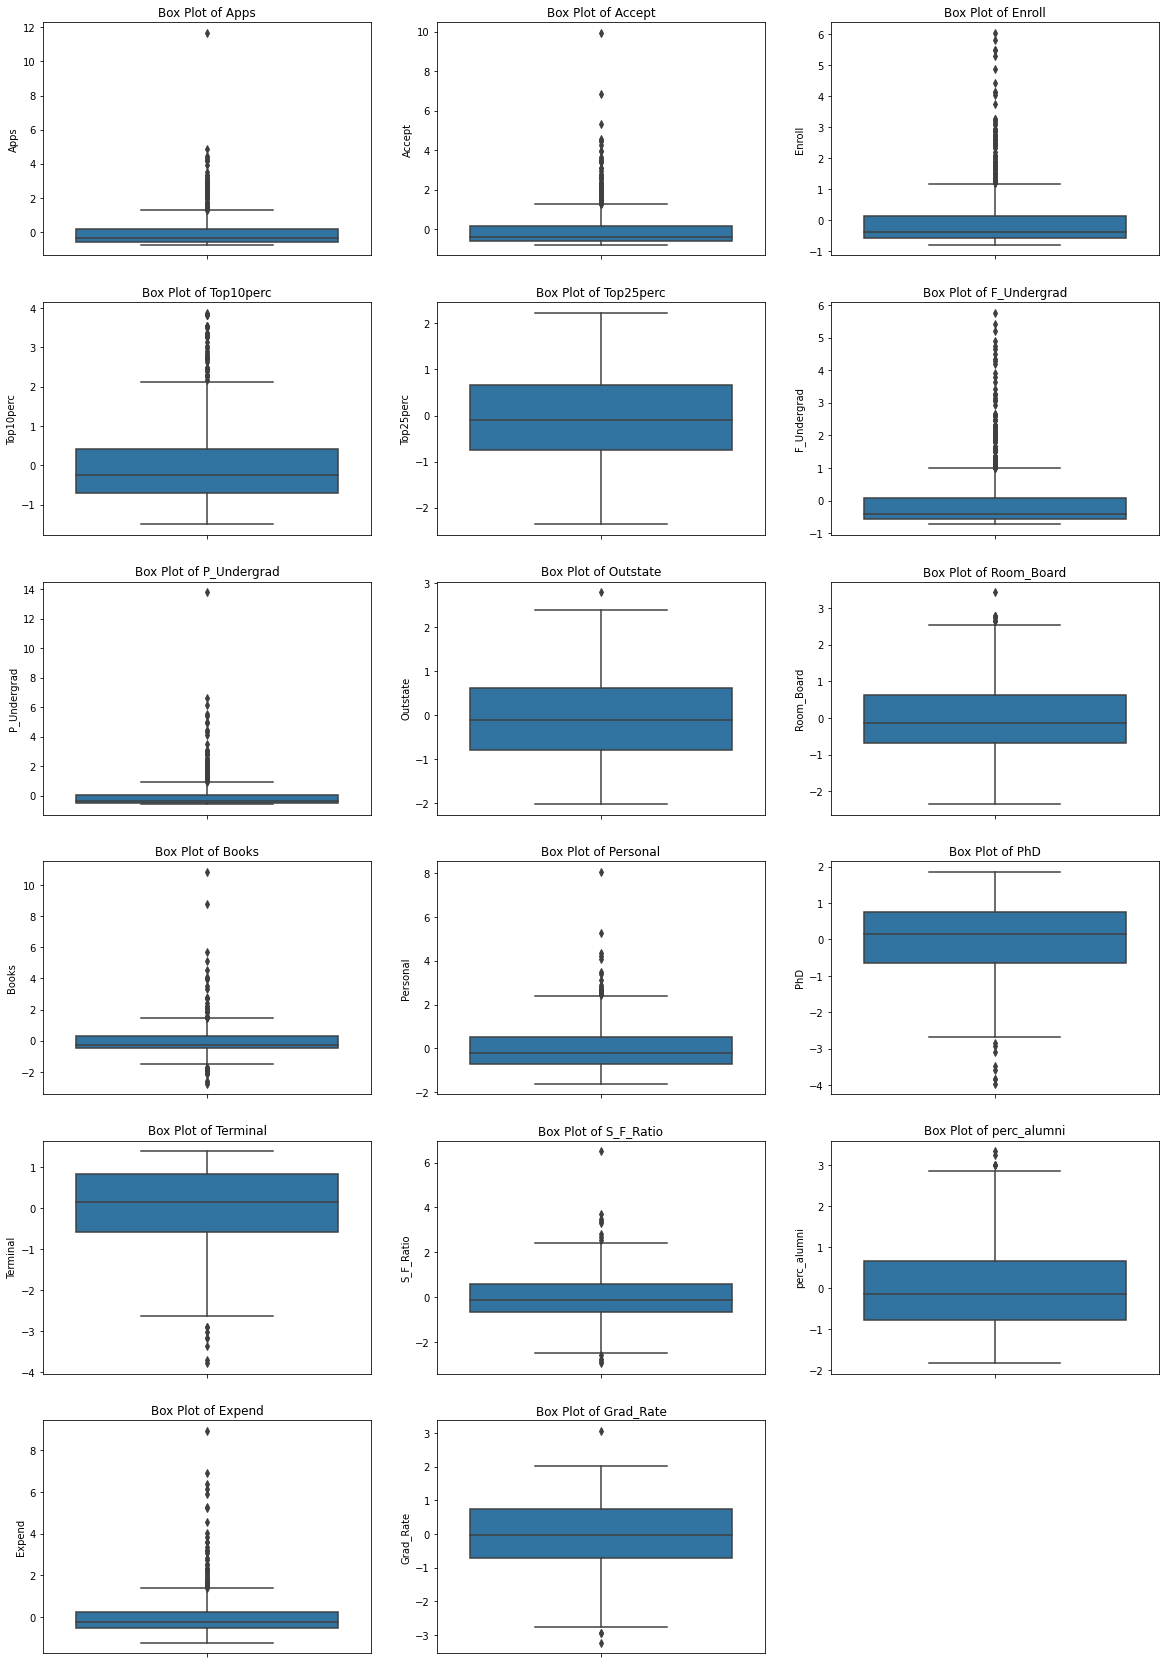

In [52]:
plt.figure(figsize=(20,30))
j=0
for i in eds.columns:
    j=j+1
    plt.subplot(6,3,j)
    sns.boxplot(y=eds[i]);
    plt.title('Box Plot of '+i)

In [53]:
#Checking for Outliers
Q1=eds.quantile(0.25)
Q3=eds.quantile(0.75)
IQR=Q3-Q1
l=pd.DataFrame(eds[(eds<(Q1-1.5*IQR))|(eds>(Q3+1.5*IQR))].count().sort_values(ascending=False),columns=['No_of_Outliers'])
l['Percentage_of_Outliers']=round(l['No_of_Outliers']/ed.shape[0]*100,1)
l

No_of_Outliers  Percentage_of_Outliers
F_Undergrad              97                    12.5
Enroll                   79                    10.2
Accept                   73                     9.4
Apps                     70                     9.0
P_Undergrad              67                     8.6
Books                    48                     6.2
Expend                   48                     6.2
Top10perc                39                     5.0
Personal                 20                     2.6
S_F_Ratio                12                     1.5
Terminal                  8                     1.0
PhD                       8                     1.0
Room_Board                7                     0.9
perc_alumni               5                     0.6
Grad_Rate                 4                     0.5
Outstate                  1                     0.1
Top25perc                 0                     0.0

#### Insights
1. There are outliers in the dataset before and after scaling.
2. The percentage of outliers remains unchanged in each variable before and after scaling.

### 2.5.  Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca.fit_transform(eds)

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

In [55]:
np.arange(1,17)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [56]:
# Eigenvalues
pd.DataFrame(pca.explained_variance_,columns=["Eigen_Value"],index=np.arange(1,18)).round(2).T

1     2     3     4     5     6     7     8     9    10    11  \
Eigen_Value  5.45  4.48  1.17  1.01  0.93  0.85  0.61  0.59  0.53  0.4  0.31   

               12    13    14    15    16    17  
Eigen_Value  0.22  0.17  0.14  0.09  0.04  0.02

In [57]:
# Eigenvectors
plt.figure(figsize=(15,15))
pd.DataFrame(pca.components_,columns=np.arange(1,18),index=['Eigen Vector 1','Eigen Vector 2','Eigen Vector 3','Eigen Vector 4','Eigen Vector 5','Eigen Vector 6','Eigen Vector 7','Eigen Vector 8','Eigen Vector 9','Eigen Vector 10','Eigen Vector 11','Eigen Vector 12','Eigen Vector 13','Eigen Vector 14','Eigen Vector 15','Eigen Vector 16','Eigen Vector 17']).round(3)

1      2      3      4      5      6      7      8   \
Eigen Vector 1   0.249  0.208  0.176  0.354  0.344  0.155  0.026  0.295   
Eigen Vector 2   0.332  0.372  0.404 -0.082 -0.045  0.418  0.315 -0.250   
Eigen Vector 3  -0.063 -0.101 -0.083  0.035 -0.024 -0.061  0.140  0.047   
Eigen Vector 4   0.281  0.268  0.162 -0.052 -0.110  0.100 -0.159  0.131   
Eigen Vector 5   0.006  0.056 -0.056 -0.395 -0.427 -0.043  0.302  0.223   
Eigen Vector 6  -0.016  0.008 -0.043 -0.053  0.033 -0.043 -0.191 -0.030   
Eigen Vector 7  -0.042 -0.013 -0.028 -0.161 -0.118 -0.025  0.061  0.109   
Eigen Vector 8  -0.103 -0.056  0.059 -0.123 -0.102  0.079  0.571  0.010   
Eigen Vector 9  -0.090 -0.178 -0.129  0.341  0.404 -0.059  0.561 -0.005   
Eigen Vector 10  0.053  0.041  0.034  0.064  0.015  0.021 -0.223  0.187   
Eigen Vector 11  0.043 -0.058 -0.069 -0.008 -0.273 -0.081  0.101  0.143   
Eigen Vector 12  0.024 -0.145  0.011  0.039 -0.089  0.056 -0.064 -0.823   
Eigen Vector 13  0.596  0.293 -0.445  0.001  0.022 -0.524  0.126 -0.142   
Eigen Vector 14  0.081  0.033 -0.086 -0.108  0.152 -0.056  0.019 -0.034   
Eigen Vector 15  0.133 -0.145  0.030  0.698 -0.617  0.010  0.021  0.038   
Eigen Vector 16  0.459 -0.519 -0.404 -0.149  0.052  0.560 -0.053  0.102   
Eigen Vector 17  0.359 -0.543  0.610 -0.145  0.080 -0.415  0.009  0.051   

                    9      10     11     12     13     14     15     16     17  
Eigen Vector 1   0.249  0.065 -0.043  0.318  0.317 -0.177  0.205  0.319  0.252  
Eigen Vector 2  -0.138  0.056  0.220  0.058  0.046  0.247 -0.247 -0.132 -0.169  
Eigen Vector 3   0.149  0.677  0.500 -0.127 -0.066 -0.290 -0.147  0.227 -0.208  
Eigen Vector 4   0.185  0.087 -0.231 -0.535 -0.519 -0.161  0.017  0.079  0.269  
Eigen Vector 5   0.561 -0.127 -0.222  0.140  0.205 -0.079 -0.216  0.076 -0.109  
Eigen Vector 6   0.163  0.641 -0.331  0.091  0.155  0.487 -0.047 -0.298  0.216  
Eigen Vector 7   0.210 -0.150  0.634 -0.001 -0.028  0.219  0.243 -0.227  0.560  
Eigen Vector 8  -0.221  0.213 -0.233 -0.077 -0.012 -0.084  0.679 -0.054 -0.005  
Eigen Vector 9   0.275 -0.134 -0.094 -0.185 -0.255  0.275 -0.255 -0.049  0.042  
Eigen Vector 10  0.298 -0.082  0.136 -0.123 -0.089  0.472  0.423  0.132 -0.590  
Eigen Vector 11 -0.359  0.032 -0.019  0.040 -0.059  0.445 -0.131  0.692  0.220  
Eigen Vector 12  0.355 -0.028 -0.039  0.023  0.016 -0.011  0.183  0.326  0.122  
Eigen Vector 13 -0.070  0.011  0.039  0.128 -0.058 -0.018  0.104 -0.094 -0.069  
Eigen Vector 14 -0.058 -0.067  0.028 -0.691  0.671  0.041 -0.027  0.073  0.036  
Eigen Vector 15  0.003 -0.009 -0.003 -0.112  0.159 -0.021 -0.008 -0.228 -0.003  
Eigen Vector 16 -0.026  0.003 -0.013  0.030 -0.027 -0.021  0.003 -0.044 -0.005  
Eigen Vector 17  0.001  0.001 -0.001  0.014  0.006 -0.002 -0.019 -0.035 -0.013

<Figure size 1080x1080 with 0 Axes>

### 2.6.  Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [58]:
# evm: Eigen Vector Matrix
evm=pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],columns=eds.columns)
evm.T.round(3)

PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
Apps         0.249  0.332 -0.063  0.281  0.006 -0.016 -0.042 -0.103 -0.090   
Accept       0.208  0.372 -0.101  0.268  0.056  0.008 -0.013 -0.056 -0.178   
Enroll       0.176  0.404 -0.083  0.162 -0.056 -0.043 -0.028  0.059 -0.129   
Top10perc    0.354 -0.082  0.035 -0.052 -0.395 -0.053 -0.161 -0.123  0.341   
Top25perc    0.344 -0.045 -0.024 -0.110 -0.427  0.033 -0.118 -0.102  0.404   
F_Undergrad  0.155  0.418 -0.061  0.100 -0.043 -0.043 -0.025  0.079 -0.059   
P_Undergrad  0.026  0.315  0.140 -0.159  0.302 -0.191  0.061  0.571  0.561   
Outstate     0.295 -0.250  0.047  0.131  0.223 -0.030  0.109  0.010 -0.005   
Room_Board   0.249 -0.138  0.149  0.185  0.561  0.163  0.210 -0.221  0.275   
Books        0.065  0.056  0.677  0.087 -0.127  0.641 -0.150  0.213 -0.134   
Personal    -0.043  0.220  0.500 -0.231 -0.222 -0.331  0.634 -0.233 -0.094   
PhD          0.318  0.058 -0.127 -0.535  0.140  0.091 -0.001 -0.077 -0.185   
Terminal     0.317  0.046 -0.066 -0.519  0.205  0.155 -0.028 -0.012 -0.255   
S_F_Ratio   -0.177  0.247 -0.290 -0.161 -0.079  0.487  0.219 -0.084  0.275   
perc_alumni  0.205 -0.247 -0.147  0.017 -0.216 -0.047  0.243  0.679 -0.255   
Expend       0.319 -0.132  0.227  0.079  0.076 -0.298 -0.227 -0.054 -0.049   
Grad_Rate    0.252 -0.169 -0.208  0.269 -0.109  0.216  0.560 -0.005  0.042   

              PC10   PC11   PC12   PC13   PC14   PC15   PC16   PC17  
Apps         0.053  0.043  0.024  0.596  0.081  0.133  0.459  0.359  
Accept       0.041 -0.058 -0.145  0.293  0.033 -0.145 -0.519 -0.543  
Enroll       0.034 -0.069  0.011 -0.445 -0.086  0.030 -0.404  0.610  
Top10perc    0.064 -0.008  0.039  0.001 -0.108  0.698 -0.149 -0.145  
Top25perc    0.015 -0.273 -0.089  0.022  0.152 -0.617  0.052  0.080  
F_Undergrad  0.021 -0.081  0.056 -0.524 -0.056  0.010  0.560 -0.415  
P_Undergrad -0.223  0.101 -0.064  0.126  0.019  0.021 -0.053  0.009  
Outstate     0.187  0.143 -0.823 -0.142 -0.034  0.038  0.102  0.051  
Room_Board   0.298 -0.359  0.355 -0.070 -0.058  0.003 -0.026  0.001  
Books       -0.082  0.032 -0.028  0.011 -0.067 -0.009  0.003  0.001  
Personal     0.136 -0.019 -0.039  0.039  0.028 -0.003 -0.013 -0.001  
PhD         -0.123  0.040  0.023  0.128 -0.691 -0.112  0.030  0.014  
Terminal    -0.089 -0.059  0.016 -0.058  0.671  0.159 -0.027  0.006  
S_F_Ratio    0.472  0.445 -0.011 -0.018  0.041 -0.021 -0.021 -0.002  
perc_alumni  0.423 -0.131  0.183  0.104 -0.027 -0.008  0.003 -0.019  
Expend       0.132  0.692  0.326 -0.094  0.073 -0.228 -0.044 -0.035  
Grad_Rate   -0.590  0.220  0.122 -0.069  0.036 -0.003 -0.005 -0.013

### 2.7.  Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [59]:
evm.iloc[0,:].round(2).sort_values(ascending=False)

Top10perc      0.35
Top25perc      0.34
Expend         0.32
Terminal       0.32
PhD            0.32
Outstate       0.29
Grad_Rate      0.25
Room_Board     0.25
Apps           0.25
perc_alumni    0.21
Accept         0.21
Enroll         0.18
F_Undergrad    0.15
Books          0.06
P_Undergrad    0.03
Personal      -0.04
S_F_Ratio     -0.18
Name: PC1, dtype: float64

* PC1 = (0.35) * Top10perc + (0.34) * Top25perc + (0.32) * Expend + (0.32) * Terminal + (0.32) * PhD + (0.29) * Outstate + (0.25) * Grad_Rate + (0.25) * Room_Board + (0.25) * Apps + (0.21) * perc_alumni + (0.21) * Accept + (0.18) * Enroll + (0.15) * F_Undergrad + (0.06) * Books + (0.03) * P_Undergrad + (-0.04) * Personal + (-0.18) * S_F_Ratio 

### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [60]:
# Explained Variance in each Principal Component direction
pd.DataFrame(pca.explained_variance_,columns=["Explained_Variance"],index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']).round(2).T

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  \
Explained_Variance  5.45  4.48  1.17  1.01  0.93  0.85  0.61  0.59  0.53   

                    PC10  PC11  PC12  PC13  PC14  PC15  PC16  PC17  
Explained_Variance   0.4  0.31  0.22  0.17  0.14  0.09  0.04  0.02

In [61]:
# Explained Variance Ratio in each Principal Component direction
e=pca.explained_variance_ratio_
pd.DataFrame(e,columns=["Explained_Variance_Ratio"],index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']).round(2).T

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8  \
Explained_Variance_Ratio  0.32  0.26  0.07  0.06  0.05  0.05  0.04  0.03   

                           PC9  PC10  PC11  PC12  PC13  PC14  PC15  PC16  PC17  
Explained_Variance_Ratio  0.03  0.02  0.02  0.01  0.01  0.01  0.01   0.0   0.0

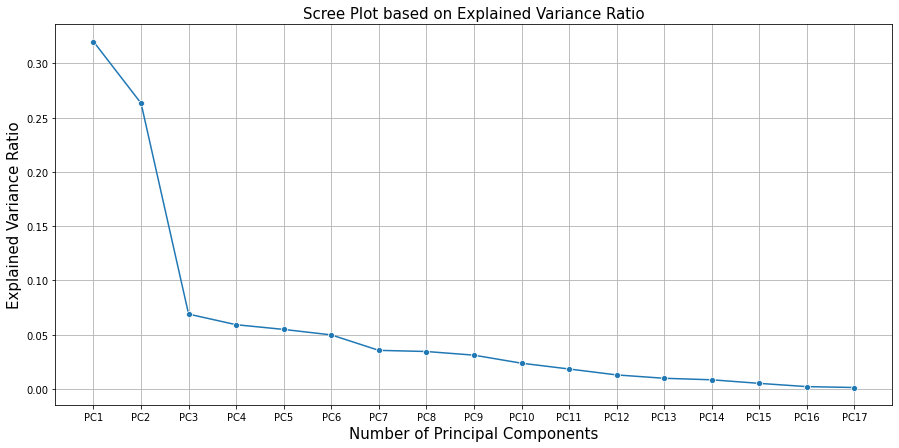

In [62]:
# Scree Plot to identify the number of principal components required
plt.figure(figsize=(15,7))
sns.lineplot(y=e,x=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],marker='o')
#sns.lineplot(y=e,x=range(1,len(e)+1),marker='o')
plt.xlabel('Number of Principal Components',fontsize=15)
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.title('Scree Plot based on Explained Variance Ratio',fontsize=15)
plt.grid()
plt.show()

In [63]:
# Cumulative Explained Variance Ratio in each Principal Component direction

pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100,columns=["Explained_Variance_Ratio"],index=np.arange(1,18)).round(2).T

1      2      3      4      5      6      7   \
Explained_Variance_Ratio  32.02  58.36  65.26  71.18  76.67  81.66  85.22   

                             8      9      10    11    12     13     14  \
Explained_Variance_Ratio  88.67  91.79  94.16  96.0  97.3  98.29  99.13   

                             15     16     17  
Explained_Variance_Ratio  99.65  99.86  100.0

#### Answer:
#### The following are the rules to decide the optimum no. principal components
    a. Select optimum no. of PC's in such a way that they should explain 70-80% of total variance.
    b. Select the PC's which have eigen value more than or equal to one.

* By considering above conditions, optimum number of principal components can be considered as 4. These four PC's together explain 71.2% of total variance and these PC's have eigen values more than one.

### 2.9.  Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [64]:
from sklearn.decomposition import PCA
pcaf = PCA(n_components=4, random_state=123)
pcaf.fit_transform(eds)

array([[-1.59285540e+00,  7.67333506e-01, -1.01072665e-01,
        -9.21750291e-01],
       [-2.19240180e+00, -5.78829993e-01,  2.27879980e+00,
         3.58891645e+00],
       [-1.43096371e+00, -1.09281889e+00, -4.38092841e-01,
         6.77240573e-01],
       ...,
       [-7.32560597e-01, -7.72352585e-02, -4.01791814e-04,
         5.43122158e-02],
       [ 7.91932735e+00, -2.06832894e+00,  2.07358213e+00,
         8.52024253e-01],
       [-4.69508065e-01,  3.66660971e-01, -1.32892100e+00,
        -1.08013199e-01]])

In [65]:
# Eigenvalues
np.round(pcaf.explained_variance_,2)

array([5.45, 4.48, 1.17, 1.01])

In [66]:
np.cumsum(pcaf.explained_variance_ratio_)*100

array([32.0206282 , 58.36084263, 65.26175919, 71.18474841])

In [67]:
# Eigenvectors
pcaf.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477865,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309144, -0.10124957, -0.08298557,  0.03505825, -0.02415029,
        -0.06139305,  0.13968183,  0.04659893,  0.14896739,  0.67741157,
         0.49972113, -0.12702922, -0.06603651, -0.28984847, -0.14698929,
         0.22674311, -0.20806466],
       [ 0.28130926,  0.26781836,  0.16182684, -0.05155189, -0.10976251,
         0.10041236, -0.15855867,  0.13129125,  0.184996  ,  0.08708935,
        -0.23071058, -0.53472337, -0.5194448 , -0.16118936,  0.01731425,
         0.07927501

In [68]:
# evmf: Final Eigen Vector Matrix
evmf=pd.DataFrame(pcaf.components_,index=['PC1','PC2','PC3','PC4'],columns=eds.columns)
evmf.T

PC1       PC2       PC3       PC4
Apps         0.248766  0.331598 -0.063091  0.281309
Accept       0.207602  0.372117 -0.101250  0.267818
Enroll       0.176304  0.403724 -0.082986  0.161827
Top10perc    0.354274 -0.082412  0.035058 -0.051552
Top25perc    0.344001 -0.044779 -0.024150 -0.109763
F_Undergrad  0.154641  0.417674 -0.061393  0.100412
P_Undergrad  0.026443  0.315088  0.139682 -0.158559
Outstate     0.294736 -0.249644  0.046599  0.131291
Room_Board   0.249030 -0.137809  0.148967  0.184996
Books        0.064758  0.056342  0.677412  0.087089
Personal    -0.042529  0.219929  0.499721 -0.230711
PhD          0.318313  0.058311 -0.127029 -0.534723
Terminal     0.317056  0.046429 -0.066037 -0.519445
S_F_Ratio   -0.176958  0.246665 -0.289848 -0.161189
perc_alumni  0.205082 -0.246595 -0.146989  0.017314
Expend       0.318909 -0.131690  0.226743  0.079275
Grad_Rate    0.252316 -0.169241 -0.208065  0.269129

In [69]:
from matplotlib.patches import Rectangle

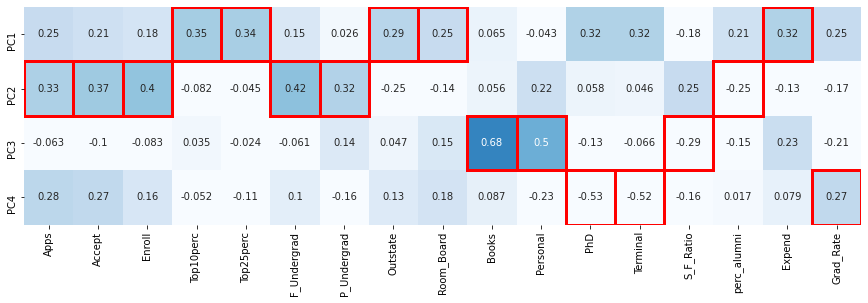

In [70]:
fig,ax = plt.subplots(figsize=(15, 4), facecolor='w', edgecolor='k')
ax = sns.heatmap(evmf, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4'])

column_max = evmf.abs().idxmax(axis=0)

for col, variable in enumerate(evmf.columns):
    position = evmf.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [89]:
edf=pd.DataFrame(pcaf.fit_transform(eds),columns=['Quality_Education','Admissions','Books_and_Personal_Exp','Quality_faculty'])
edf.head()

Quality_Education  Admissions  Books_and_Personal_Exp  Quality_faculty
0          -1.592855    0.767334               -0.101073        -0.921750
1          -2.192402   -0.578830                2.278800         3.588916
2          -1.430964   -1.092819               -0.438093         0.677241
3           2.855557   -2.630612                0.141719        -1.295479
4          -2.212008    0.021631                2.387012        -1.114513

In [157]:
edf.corr().round(1)

Quality_Education  Admissions  Books_and_Personal_Exp  \
Quality_Education                     1.0         0.0                    -0.0   
Admissions                            0.0         1.0                    -0.0   
Books_and_Personal_Exp               -0.0        -0.0                     1.0   
Quality_faculty                       0.0        -0.0                     0.0   

                        Quality_faculty  
Quality_Education                   0.0  
Admissions                         -0.0  
Books_and_Personal_Exp              0.0  
Quality_faculty                     1.0

<AxesSubplot:>

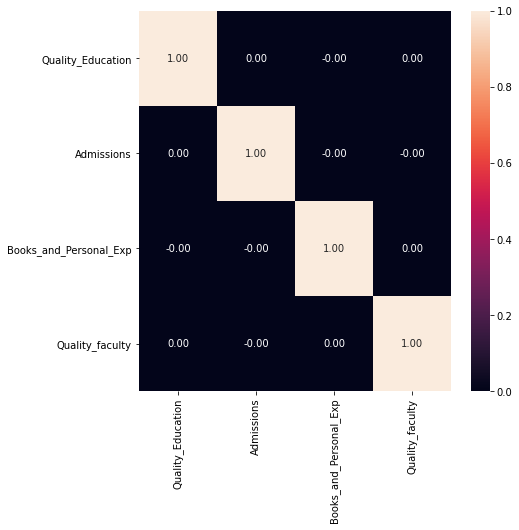

In [154]:
plt.figure(figsize=(7,7))
sns.heatmap(edf.corr(),annot=True,fmt='.2f')

In [91]:
edc=ed.select_dtypes('object')
edc

Names
0      Abilene Christian University
1                Adelphi University
2                    Adrian College
3               Agnes Scott College
4         Alaska Pacific University
..                              ...
772         Worcester State College
773               Xavier University
774  Xavier University of Louisiana
775                 Yale University
776    York College of Pennsylvania

[777 rows x 1 columns]

In [158]:
edff=pd.concat([edc,edf],axis=1)
edff.head()

Names  Quality_Education  Admissions  \
0  Abilene Christian University          -1.592855    0.767334   
1            Adelphi University          -2.192402   -0.578830   
2                Adrian College          -1.430964   -1.092819   
3           Agnes Scott College           2.855557   -2.630612   
4     Alaska Pacific University          -2.212008    0.021631   

   Books_and_Personal_Exp  Quality_faculty  
0               -0.101073        -0.921750  
1                2.278800         3.588916  
2               -0.438093         0.677241  
3                0.141719        -1.295479  
4                2.387012        -1.114513

In [140]:
edff.describe().round(2)

Quality_Education  Admissions  Books_and_Personal_Exp  Quality_faculty
count             777.00      777.00                  777.00           777.00
mean                0.00       -0.00                    0.00            -0.00
std                 2.33        2.12                    1.08             1.00
min                -5.66       -3.59                   -2.94            -2.94
25%                -1.73       -1.35                   -0.67            -0.66
50%                -0.30       -0.63                   -0.10            -0.06
75%                 1.34        0.69                    0.49             0.60
max                 8.05       12.00                    9.01             5.18

In [141]:
c1=edff.Quality_Education>edff.Quality_Education.quantile(0.75)
edff[c1].index

Int64Index([  3,   7,  10,  11,  16,  20,  23,  36,  37,  59,
            ...
            737, 752, 753, 755, 760, 763, 769, 770, 771, 775],
           dtype='int64', length=194)

In [142]:
c2=(edff.Quality_Education>edff.Quality_Education.quantile(0.50)) & (edff.Quality_Education<edff.Quality_Education.quantile(0.75))
edff[c2].index

Int64Index([  6,   8,  12,  13,  21,  24,  26,  27,  29,  31,
            ...
            743, 746, 749, 751, 756, 757, 758, 759, 764, 773],
           dtype='int64', length=193)

In [143]:
c3=(edff.Quality_Education>edff.Quality_Education.quantile(0.25)) & (edff.Quality_Education<edff.Quality_Education.quantile(0.50))
edff[c3].index

Int64Index([  0,   2,   5,  15,  22,  28,  30,  35,  38,  42,
            ...
            738, 744, 748, 750, 754, 761, 765, 767, 774, 776],
           dtype='int64', length=193)

In [144]:
c4=edff.Quality_Education<edff.Quality_Education.quantile(0.25)
edff[c4].index

Int64Index([  1,   4,   9,  14,  17,  18,  19,  25,  32,  45,
            ...
            735, 736, 739, 741, 745, 747, 762, 766, 768, 772],
           dtype='int64', length=194)

In [145]:
edtier=ed.copy()

In [146]:
edtier['Tier']=np.where(edtier.index.isin(edff[c1].index),'Tier1','Tier4')
edtier['Tier']=np.where(edtier.index.isin(edff[c2].index),'Tier2',edtier.Tier)
edtier['Tier']=np.where(edtier.index.isin(edff[c3].index),'Tier3',edtier.Tier)

In [147]:
edtier.Tier.value_counts()

Tier4    197
Tier1    194
Tier2    193
Tier3    193
Name: Tier, dtype: int64

In [164]:
edtier.head(7).T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F_Undergrad                          2885                2683            1036   
P_Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room_Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S_F_Ratio                            18.1                12.2            12.9   
perc_alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad_Rate                              60                  56              54   
Tier                                Tier3               Tier4           Tier3   

                               3                          4  \
Names        Agnes Scott College  Alaska Pacific University   
Apps                         417                        193   
Accept                       349                        146   
Enroll                       137                         55   
Top10perc                     60                         16   
Top25perc                     89                         44   
F_Undergrad                  510                        249   
P_Undergrad                   63                        869   
Outstate                   12960                       7560   
Room_Board                  5450                       4120   
Books                        450                        800   
Personal                     875                       1500   
PhD                           92                         76   
Terminal                      97                         72   
S_F_Ratio                    7.7                       11.9   
perc_alumni                   37                          2   
Expend                     19016                      10922   
Grad_Rate                     59                         15   
Tier                       Tier1                      Tier4   

                             5                        6  
Names        Albertson College  Albertus Magnus College  
Apps                       587                      353  
Accept                     479                      340  
Enroll                     158                      103  
Top10perc                   38                       17  
Top25perc                   62                       45  
F_Undergrad                678                      416  
P_Undergrad                 41                      230  
Outstate                 13500                    13290  
Room_Board                3335                     5720  
Books                      500                      500  
Personal                   675                     1500  
PhD                         67                       90  
Terminal                    73                       93  
S_F_Ratio                  9.4                     11.5  
perc_alumni                 11                       26  
Expend                    9727                     8861  
Grad_Rate                   55                       63  
Tier                     Tier3                    Tier2

In [148]:
edtier.groupby('Tier').mean().sort_values(by='Apps',ascending=False)

Apps       Accept       Enroll  Top10perc  Top25perc  \
Tier                                                                 
Tier1  6201.427835  3816.773196  1355.386598  47.922680  77.097938   
Tier2  2697.020725  1969.766839   763.481865  28.720207  59.974093   
Tier3  1963.259067  1398.124352   596.367876  19.870466  49.544041   
Tier4  1166.304569   904.335025   409.355330  13.898477  36.852792   

       F_Undergrad  P_Undergrad      Outstate   Room_Board       Books  \
Tier                                                                     
Tier1  6274.180412   945.912371  14422.520619  5176.190722  586.613402   
Tier2  3780.963731   941.518135  10959.051813  4580.455959  551.373057   
Tier3  2857.414508   834.202073   8845.181347  4085.626943  535.222798   
Tier4  1910.812183   702.263959   7574.690355  3599.304569  524.634518   

          Personal        PhD   Terminal  S_F_Ratio  perc_alumni  \
Tier                                                               
Tier1  1226.597938  88.365979  93.407216  11.870103    30.572165   
Tier2  1330.476684  78.196891  85.269430  14.036269    25.269430   
Tier3  1382.730570  68.300518  76.067358  14.826943    20.046632   
Tier4  1421.675127  56.040609  64.314721  15.605584    15.203046   

             Expend  Grad_Rate  
Tier                            
Tier1  15117.252577  78.273196  
Tier2   9258.046632  69.336788  
Tier3   7585.093264  61.901554  
Tier4   6713.096447  52.543147

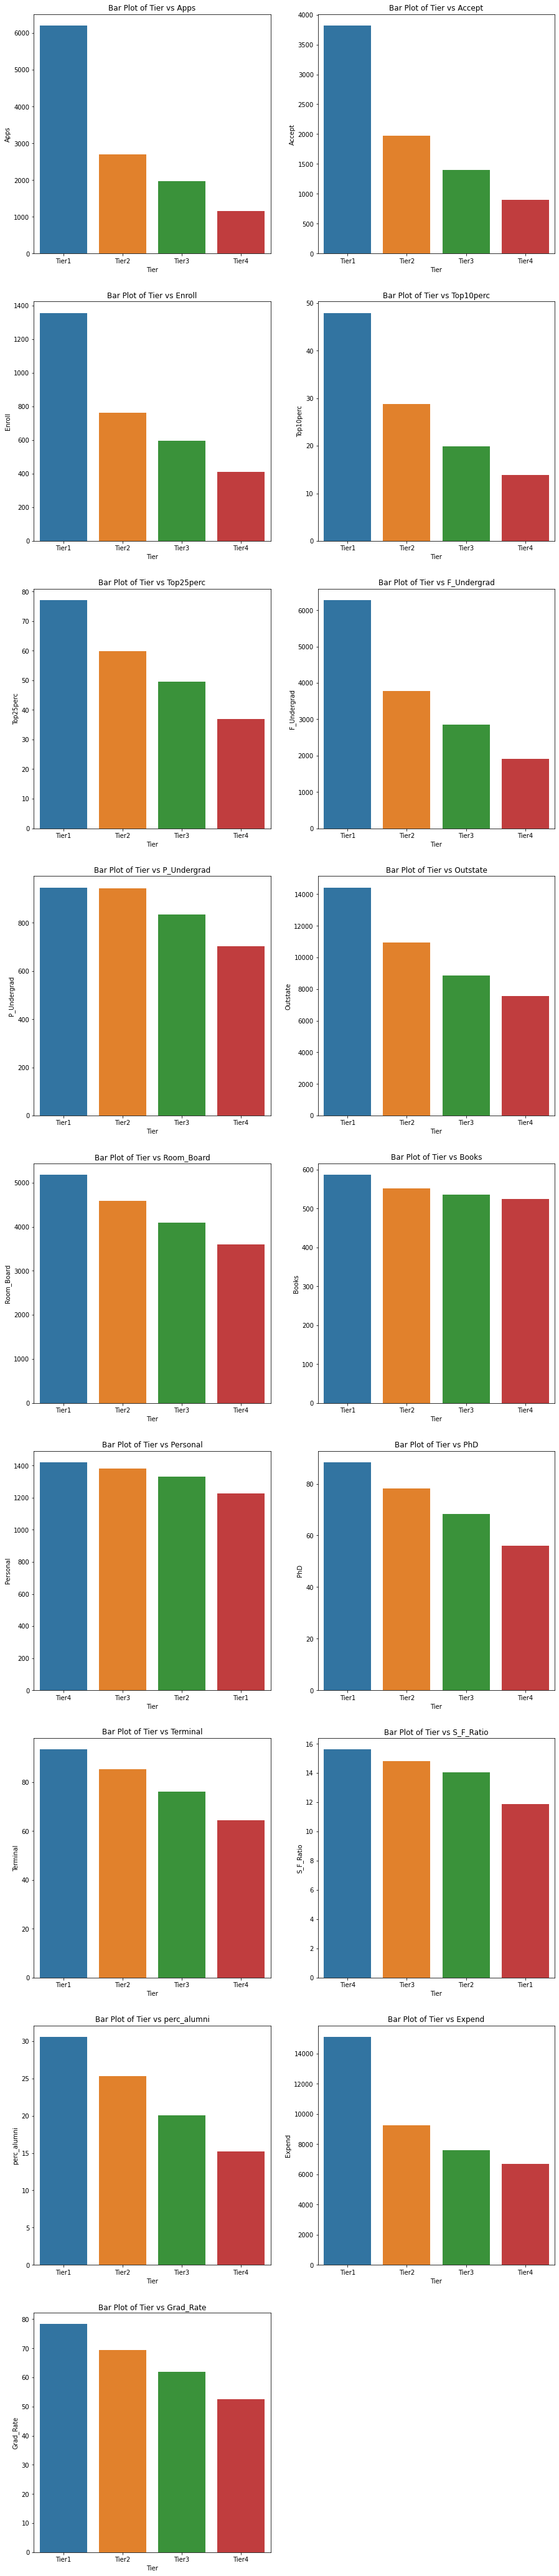

In [151]:
plt.figure(figsize=(15,75))
j=0
for i in edtier.columns:
    if edtier[i].dtype!='object':
        j=j+1
        plt.subplot(9,2,j)
        n=edtier.groupby('Tier').mean().sort_values(by=i,ascending=False)
        sns.barplot(x=n.index,y=n[i],ci=False);
        #sns.barplot(x=edtier.Tier,y=edtier[i],ci=False);
        plt.title('Bar Plot of Tier vs '+i)       